In [42]:
# Load librairies
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [43]:
# Load and preprocess the image
original_image = Image.open('datasets\\colorful-night.jpg').resize((256, 256))
original_image = np.array(original_image, dtype=float) / 255.0  # Normalize
original_image = np.expand_dims(original_image, axis=0)  # Add batch dimension




In [44]:
# Load and preprocess the image
original_image = Image.open('datasets\\colorful-night.jpg').resize((256, 256))
original_image = original_image.convert('L')  # Convert to grayscale
original_image = np.array(original_image, dtype=float) / 255.0  # Normalize
original_image = np.expand_dims(original_image, axis=-1)  # Add channel dimension
original_image = np.expand_dims(original_image, axis=0)  # Add batch dimension


In [45]:
original_image.shape

(1, 256, 256, 1)

In [46]:
# Autoencoder architecture
input_img = Input(shape=(256, 256, 1))  # Adjust for grayscale

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(original_image, original_image, epochs=150, batch_size=1)



Epoch 1/150
1/1 [==============================] - 1s 909ms/step - loss: 0.6896
Epoch 2/150
1/1 [==============================] - 0s 102ms/step - loss: 0.6854
Epoch 3/150
1/1 [==============================] - 0s 106ms/step - loss: 0.6826
Epoch 4/150
1/1 [==============================] - 0s 111ms/step - loss: 0.6819
Epoch 5/150
1/1 [==============================] - 0s 118ms/step - loss: 0.6796
Epoch 6/150
1/1 [==============================] - 0s 111ms/step - loss: 0.6761
Epoch 7/150
1/1 [==============================] - 0s 106ms/step - loss: 0.6728
Epoch 8/150
1/1 [==============================] - 0s 100ms/step - loss: 0.6691
Epoch 9/150
1/1 [==============================] - 0s 101ms/step - loss: 0.6654
Epoch 10/150
1/1 [==============================] - 0s 107ms/step - loss: 0.6606
Epoch 11/150
1/1 [==============================] - 0s 113ms/step - loss: 0.6550
Epoch 12/150
1/1 [==============================] - 0s 107ms/step - loss: 0.6487
Epoch 13/150
1/1 [===================

In [48]:
# Compress and decompress the image
compressed_image = autoencoder.predict(original_image)



1/1 [==============================] - 0s 47ms/step


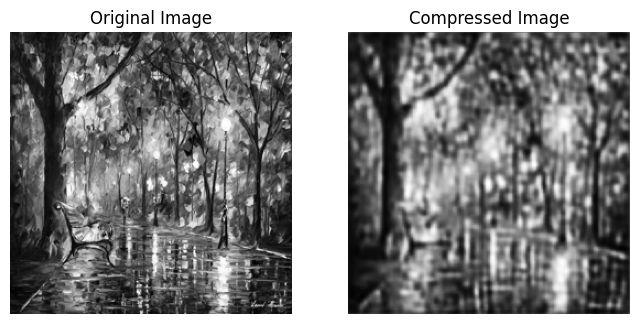

In [49]:


# Display the original and compressed images
plt.figure(figsize=(8, 4))

# Original Image
ax = plt.subplot(1, 2, 1)
plt.imshow(original_image[0, :, :, 0], cmap='gray')
plt.title("Original Image")
ax.axis('off')

# Compressed Image
ax = plt.subplot(1, 2, 2)
plt.imshow(compressed_image[0, :, :, 0], cmap='gray')
plt.title("Compressed Image")
ax.axis('off')

plt.show()